# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "data/train.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes =  len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


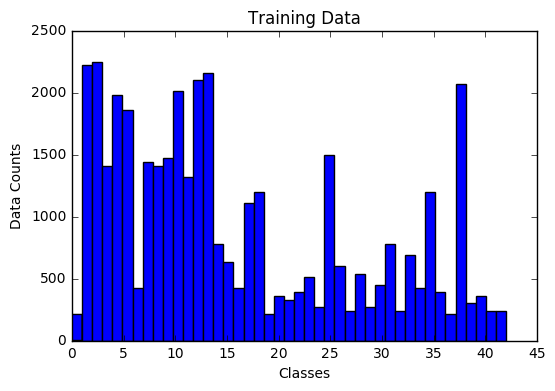

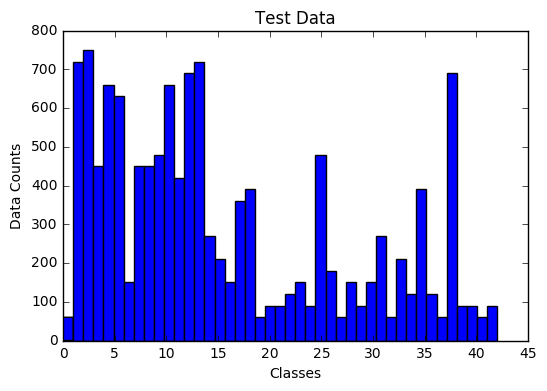

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt

# Histogram to explore the balance of training data
plt.hist(y_train, bins = n_classes)
plt.xlabel('Classes')
plt.ylabel('Data Counts')
plt.title('Training Data')
plt.show();

# Histogram to explore the balance of test data
plt.hist(y_test, bins = n_classes)
plt.xlabel('Classes')
plt.ylabel('Data Counts')
plt.title('Test Data')
plt.show();

### Note:
As we can see from the histogram above, both the training data and the test data are very unbalanced between different traffic signs. Some traffic signs have more than 2000 images and some only have less than 500. Additional generated data should be useful for those less sampled traffic signs. Note that at least the number of images of the classes are at least correlated between the training data and the test data.

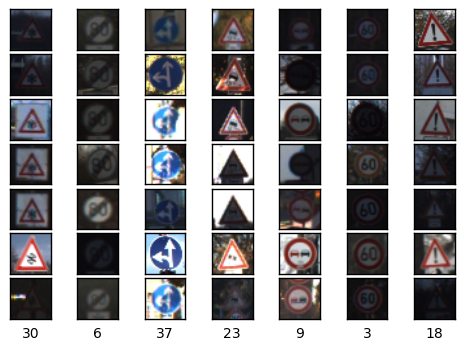

In [4]:
import random

# Function to plot random images for random classes
def plot_images(image, label, label_number, image_number):
    # Pick random classes
    sample_classes = random.sample(range(min(y_train), max(y_train) + 1), label_number)
    # Initialize subplots
    fig, axes = plt.subplots(label_number, image_number)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    # Go through all the classes
    for i, ax in enumerate(axes.flat):
        cls = sample_classes[i%label_number]
        # Pick random images from the class
        img_ind = random.choice(np.where(y_train == cls)[0])
        # Plot
        ax.imshow(image[img_ind]);
        ax.set_xlabel(str(cls))
        ax.set_xticks([])
        ax.set_yticks([])

# Show 7 pictures from 7 random classes
plot_images(X_train, y_train, 7, 7)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.preprocessing import LabelBinarizer

# Implement Min-Max scaling for the image data
# Or use MinMaxScaler() from Scikit-learn
def normalize_img(img):
    x_min = 0
    x_max = 255
    a = -1.0
    b = 1.0
    return a + (img - x_min) * (b - a) / (x_max - x_min)

X_train = normalize_img(X_train)  
X_test = normalize_img(X_test)

# Implement one-hot encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

1. For the features, I used normailization to keep the image pixel values between -1.0 and 1.0
2. For the labels, I used one-hot encoding.
3. I did not turn the images into gray color since color information is useful for the classifier (e.g., blue usually means notification and red usually means warning)
4. Future work: generate additional jittered data to balance the images. 

In [6]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

print("trainning data size: %d, validation data size: %d" %(X_train.shape[0], X_valid.shape[0]))

trainning data size: 31367, validation data size: 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I used scikit-learn's train_test_split function to split training data to training and validation data with a ratio of 5 to 1. Validation data will be used to evaluate the performance of the neural network at each training epoch.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# Input image size
image_size = X_train[0].shape[0]
num_channels = X_train[0].shape[2]

# Filter size
patch_size = 5
depth1 = 32
depth2 = 64
num_hidden = 1024

graph = tf.Graph()
with graph.as_default():
    features = tf.placeholder(tf.float32, [None, image_size, image_size, num_channels])
    labels = tf.placeholder(tf.float32, [None, n_classes])
    keep_prob = tf.placeholder(tf.float32)
    betha = tf.placeholder(tf.float32)
    learning_rate = tf.placeholder(tf.float32)
    
    
    weights =  {
        'layer1': tf.Variable(tf.truncated_normal(shape = [patch_size, patch_size, num_channels, depth1], 
                                                  stddev = 0.1)),
        'layer2': tf.Variable(tf.truncated_normal(shape = [patch_size, patch_size, depth1, depth2], 
                                                  stddev = 0.1)),
        # '4' here because we have 2 max pooling with stride of 2
        'layer3': tf.Variable(tf.truncated_normal(shape = [image_size // 4 * image_size // 4 * depth2, num_hidden], 
                                                  stddev = 0.1)),
        'layer4': tf.Variable(tf.truncated_normal(shape = [num_hidden, n_classes], stddev = 0.1))
    }
    
    biases = {
        'layer1': tf.Variable(tf.zeros([depth1])),
        'layer2': tf.Variable(tf.zeros([depth2])),
        'layer3': tf.Variable(tf.zeros([num_hidden])),
        'layer4': tf.Variable(tf.zeros([n_classes]))
    }
    
    # Layer 1, output size: 16 x 16 x 32
    conv = tf.nn.conv2d(features, weights['layer1'], [1, 1, 1, 1], padding = 'SAME')
    hidden = tf.nn.relu(conv + biases['layer1'])
    pool = tf.nn.max_pool(hidden, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

    # Layer 2, output size: 8 x 8 x 64
    conv = tf.nn.conv2d(pool, weights['layer2'], [1, 1, 1, 1], padding = 'SAME')
    hidden = tf.nn.relu(conv + biases['layer2'])
    pool = tf.nn.max_pool(hidden, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    
    # Layer 3, output size: 1 x 1024
    shape = pool.get_shape().as_list()
    reshape = tf.reshape(pool, shape = [-1, shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, weights['layer3']) + biases['layer3'])
    hidden = tf.nn.dropout(hidden, keep_prob)
    
    # Layer 4, output size: 1 x 43
    logits = tf.matmul(hidden, weights['layer4']) + biases['layer4']

    # Regulation
    regul = betha * (tf.nn.l2_loss(weights['layer1']) + 
                     tf.nn.l2_loss(weights['layer2']) +
                     tf.nn.l2_loss(weights['layer3']) +
                     tf.nn.l2_loss(weights['layer4']) )
    # Optimizaer
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels) + regul)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    # Prediction
    prediction = tf.nn.softmax(logits)
    # Top five result
    top_five = tf.nn.top_k(prediction, 5)
    # Correct prediction
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
    # Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # Model saver
    saver = tf.train.Saver()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used a convolutional neural network followed by fully connected layers. The detailed structure of the neural network is:

1. Input layer with size of 32 by 32 by 3 (i.e., no resizing performed on the input images).
2. Convolution with 5 by 5 kernel, stride of 1, depth of 32, and same padding.
3. Max pooling with 3 by 3 kernel and stride of 2.
4. Convolution with 5 by 5 kernel, stride of 1, depth of 64, and same padding.
5. Max pooling with 3 by 3 kernel and stride of 2.
6. Fully connected layer with 1024 hidden nodes.
7. Relu.
8. Dropout with keep probability of 0.5.
9. Fully connected layer with 43 logits output.
10. Regularization with betha value of 1e-6.
11. Softmax of the logits for optimizer.

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Maximum epoch number
epochs = 50

# Batch size
batch_size = 128

# Training data size
train_data_size = X_train.shape[0]

# Feed_dict for validation data
feed_dict_valid = {features: X_valid, labels: y_valid, keep_prob: 1.0}

# Feed_dict for test data
feed_dict_test = {features: X_test, labels: y_test, keep_prob: 1.0}

with tf.Session(graph = graph) as session:
    tf.initialize_all_variables().run()
    for epoch in range(1, epochs + 1):
        # Shuffle the indices for the trainning data
        ind = np.arange(0, train_data_size)
        np.random.shuffle(ind)
        X_train_shuffle = X_train[ind]
        y_train_shuffle = y_train[ind]
        # Go through all the batches
        # 'train_data_size - batch_size' to ignore the residual samples at end of each epoch
        for batch_ind in range(0, train_data_size - batch_size, batch_size):
            batch_data = X_train_shuffle[batch_ind : (batch_ind + batch_size), :, :, :]
            batch_labels = y_train_shuffle[batch_ind : (batch_ind + batch_size), :]
            feed_dict_train = { features: batch_data, 
                                labels: batch_labels, 
                                keep_prob: 0.5,
                                betha: 1e-6,
                                learning_rate: 1e-3 }
            _, l, acc = session.run([optimizer, loss, accuracy], feed_dict = feed_dict_train)
        print("epoch: %d\tloss: %f\taccuracy: %f" %(epoch, l, acc))
        valid_acc = accuracy.eval(feed_dict = feed_dict_valid)
        print("validation accuracy:\t%f" %valid_acc)
        # If both accuracy better than 0.99, stop running
        if(valid_acc > 0.99 and acc > 0.99):
            break
    print("test accuracy:\t%f" %accuracy.eval(feed_dict = feed_dict_test))
    save_model = saver.save(session, "model.ckpt")
    print("Model saved as %s" %save_model)

epoch: 1	loss: 0.432209	accuracy: 0.890625
validation accuracy:	0.901301
epoch: 2	loss: 0.243146	accuracy: 0.929688
validation accuracy:	0.960087
epoch: 3	loss: 0.106182	accuracy: 0.968750
validation accuracy:	0.979470
epoch: 4	loss: 0.101046	accuracy: 0.992188
validation accuracy:	0.985335
epoch: 5	loss: 0.088811	accuracy: 0.976562
validation accuracy:	0.987376
epoch: 6	loss: 0.041038	accuracy: 0.992188
validation accuracy:	0.988523
epoch: 7	loss: 0.081639	accuracy: 0.984375
validation accuracy:	0.991201
epoch: 8	loss: 0.038710	accuracy: 1.000000
validation accuracy:	0.991456
test accuracy:	0.920348
Model saved as model.ckpt


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. Optimizer: Adam Optimizer with a learning rate of 0.001. After several trial, Adam Optimizer works better than gradient descent optimizer since it adapts the learning rate better according to the losses.
2. Batch size: 128. If batch size is too big, it takes too much memory. If batch size is too small, the training accuracy is less meaningful with a much smaller sample size. 128 is what I chose and I don't know what's the optimal number.
3. Epochs: 50 with early termination. I run at most 50 epochs. But when both the training accuracy and the validation accuracy is better than 99%, I terminate the training process. It usually takes around 8 epochs to achieve it.
4. Regularization beta value: 1e-6. Experimental value. Need feedback on how to optimize it.


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

The structure of a convolutional neural network follows by fully connected layers is a standard approach for image recogniztion. In this way, we can capture all the information from convolution so that the position of the sign in the image matter less. 

The sizes of the neural networks as well as the hyperparameters are determined by trial and error. I don't have a good intuition on how to choose the parameters. I basically tried a lot of them and settled with the ones give me the best performance.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
# Getting the truth label reference from the provided csv file
truth_label = np.genfromtxt('signnames.csv', 
                            delimiter=',' , 
                            usecols=(1,), 
                            unpack=True,  
                            dtype=str,  
                            skip_header=1)

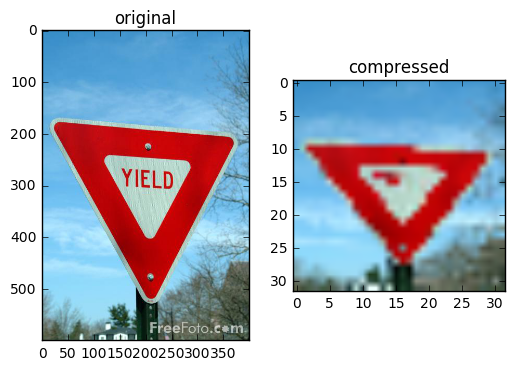

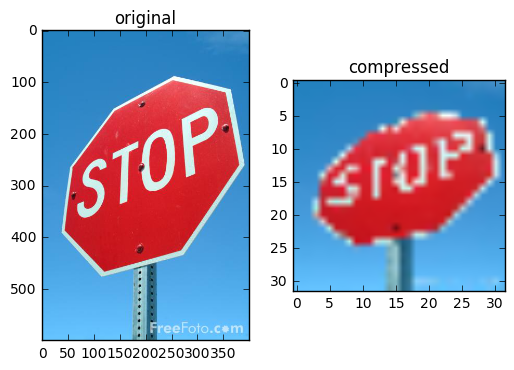

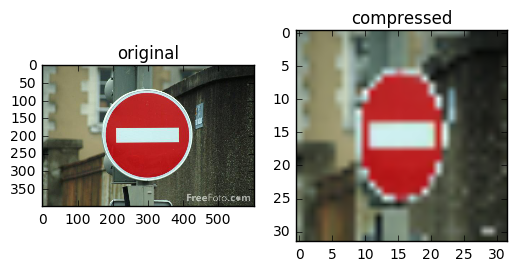

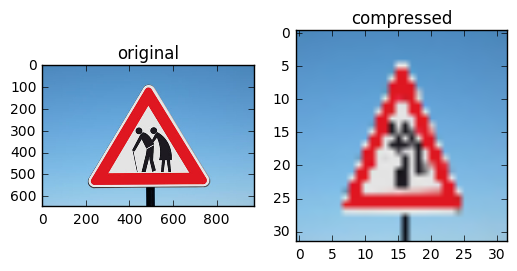

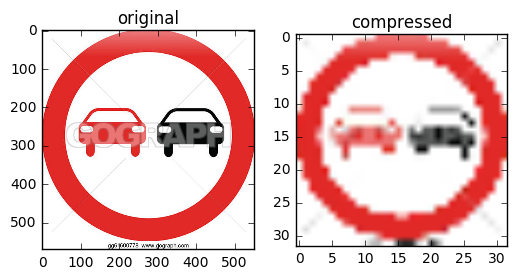

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2
import os

# Placeholders for the images and labels I found from web
web_images = np.empty(shape = [1, 32, 32, 3], dtype = np.float32)
web_labels = np.empty(shape = [1], dtype = np.int8)

# Image directory
directory = 'images/'

# Go through all the files
for file in os.listdir(directory):
    # Skip the garbage file
    if(file == '.DS_Store'):
        continue
    # Read the image
    img = mpimg.imread(os.path.join(directory, file))
    # Some PNG file has a 4th "alpha" channel
    if(img.shape[2] == 4):
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    # Compress the image to 32 by 32
    resize_img = cv2.resize(img, (32, 32))
    # Normalize the image
    norm_resize_img = np.reshape(normalize_img(resize_img),[1, 32, 32, 3])
    # Add the image to the array
    web_images = np.vstack([web_images, norm_resize_img])
    # Get the label number from the file name
    label = np.int8(os.path.splitext(file)[0])
    web_labels = np.vstack([web_labels, label])
    # Plot the original image
    plt.figure()
    plt.subplot(121)
    plt.imshow(img)
    plt.title('original')
    # Plot the compressed image
    plt.subplot(122)
    plt.imshow(resize_img)
    plt.title('compressed')
    plt.show()
    
# Get rid of the first empty row
web_images = web_images[1:, :, :, :]
web_labels = web_labels[1:]

# One-hot encoding of the labels
web_labels_encoded = encoder.transform(web_labels)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

The most notable thing I realize is that after compressing the images to 32 by 32, some of the signs are unreadable. However, the neural network can still capture some of the information and give correct classfication. The difference is when I read a traffic sign, I read the words on the sign primarily. But for the neural network, it catches more information such as color and shape. We can see from the prediction below, the neural network actually predicts correctly the "Yield" sign even though you can't really read the sign after the compression (see the figure above). My guess is that the triangle shape played a big part in the prediction for the neural network.

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Feed_dict for the web images
feed_dict_web = {features: web_images, labels: web_labels_encoded, keep_prob: 1.0}

with tf.Session(graph = graph) as sess:
    # Restore the trained model
    saver.restore(sess, 'model_93.ckpt')
    # Get the top five result
    acc, top_five_res = sess.run([accuracy, top_five], feed_dict = feed_dict_web)
    # Go through all the images
    for i in range(web_images.shape[0]):
        print('\n-----------------------------')
        print('image %d \ttruth: %s' %(i+1, truth_label[np.squeeze(web_labels[i])]))
        print('\nClassifier top 5:')
        for j in range(5):
            # Get the probability of the result
            prob = top_five_res.values[i][j]*100
            if(prob < 0.1):
                break
            # Get the label of the result
            label = truth_label[top_five_res.indices[i][j]]
            print('%.1f%%\t\t%s' %(prob, label))
    print('\nTest accuracy: %f' %acc)


-----------------------------
image 1 	truth: Yield

Classifier top 5:
100.0%		Yield

-----------------------------
image 2 	truth: Stop

Classifier top 5:
100.0%		Stop

-----------------------------
image 3 	truth: No entry

Classifier top 5:
100.0%		No entry

-----------------------------
image 4 	truth: Pedestrians

Classifier top 5:
89.1%		Right-of-way at the next intersection
9.8%		Traffic signals
0.9%		Priority road
0.1%		General caution

-----------------------------
image 5 	truth: No passing

Classifier top 5:
51.2%		Roundabout mandatory
45.1%		End of no passing
3.0%		Keep right
0.6%		Ahead only

Test accuracy: 0.600000


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

My model only predicted correctly for 3 out of 5 images from web (accuracy = 60%). The sample size is too small so the accuracy percentage doesn't mean too much. But it is safe to say it performs worse than the test dataset (accuracy = 92%).   
Since I didn't generate additional jittered data, there is a huge inbalance in the dataset. As a result, my neural network did well for the signs have a significant number of samples (such as "yield" and "stop") in the training data. However, for the signs have a small number of samples in the training data, it does pretty terrible. My next goal is to generate jittered data to balance it.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

For the 3 images my neural network predicted correctly, they are all predicted as 100% from softmax. On the other hand, for the 2 images predicted falsely, they are not even in the top 5. Again, these two images are presented rarely in the training dataset. Generating additonal jittered images for these rare classes should be helpful.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.